In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [2]:
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [3]:
%cd lstm_model_data/

/content/gdrive/.shortcut-targets-by-id/1IUYhmMACbf1sXUDQbs__iHRmj6-WG8SJ/lstm_model_data


In [4]:
!ls

checkpoint1  checkpoint_95_stand      data_preprossessed.csv
checkpoint2  checkpoint_95_stand2     model_hab_plot.png
checkpoint3  checkpoint_95_stand_hab  model_sal_plot.png
checkpoint4  data_95_stand.csv	      preprossessed_data.csv


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#import matplotlib.pyplot as plt

In [19]:
dataset = pd.read_csv(r'C:/Users/PC.PACK/Desktop/archive/data_95_stand.csv')

In [8]:
# dataset['type'] = dataset['type'].replace({'benign': 0, 'phishing': 1})

In [9]:
dataset.shape

(75288, 36)

In [20]:
X = dataset.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35] ].values #not including protocol feature
Y = dataset.iloc[:, [1]].values

In [11]:
X.shape

(75288, 34)

In [21]:
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
X = trans.fit_transform(X)

In [22]:
X=X.reshape(75288,34,1)

In [14]:
Y.shape

(75288, 1)

In [15]:
print(X)

[[[-1.84882601e-01]
  [ 2.47418105e-01]
  [-2.00418347e-01]
  ...
  [ 1.74240825e-01]
  [-4.60748476e-02]
  [-8.86525229e-02]]

 [[-1.75996216e-01]
  [ 2.14467461e-01]
  [-1.57411120e-01]
  ...
  [-1.24677570e+00]
  [-7.34392334e-01]
  [ 7.79345141e-01]]

 [[-1.82723457e-01]
  [ 2.34636499e-01]
  [-1.82668231e-01]
  ...
  [ 2.09670273e-02]
  [-3.59141866e-01]
  [-1.35052777e-01]]

 ...

 [[-1.84930283e-01]
  [ 2.44981492e-01]
  [-1.97645936e-01]
  ...
  [ 1.55765372e-04]
  [ 1.03503203e-01]
  [-7.84730523e-03]]

 [[-1.84750028e-01]
  [ 2.43443159e-01]
  [-1.98695482e-01]
  ...
  [ 2.81981600e-01]
  [-4.27957149e-01]
  [ 1.35203663e-01]]

 [[-1.84824524e-01]
  [ 2.47935187e-01]
  [-2.01076993e-01]
  ...
  [-1.87463848e-01]
  [ 2.91420682e-02]
  [-1.59005391e-03]]]


In [16]:
print(Y)

[[1]
 [0]
 [1]
 ...
 [1]
 [1]
 [1]]


In [23]:

X_D,X_tst,Y_D,Y_tst=train_test_split(X,Y,test_size=0.1)

In [24]:
X_tr,X_val,Y_tr,Y_val=train_test_split(X_D,Y_D,test_size=0.1)

In [27]:
X_tr.shape

(60983, 34, 1)

In [28]:
X_tst.shape

(7529, 34, 1)

In [21]:
X_val.shape

(6776, 34, 1)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout,Embedding,BatchNormalization


In [10]:
model=Sequential()
model.add(LSTM(100,input_shape=(34,1),activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))
model.summary()
 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 34, 100)           40800     
                                                                 
 dropout_3 (Dropout)         (None, 34, 100)           0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 batch_normalization_1 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                      

In [4]:
!pip install visualkeras


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 43.2/43.2 kB 1.1 MB/s eta 0:00:00


In [11]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model)

TypeError: 'int' object is not iterable

In [24]:
import os
try:
  os.mkdir('checkpoint_95_stand3')
except:
  pass



In [25]:
import tensorboard
from datetime import datetime
import tensorflow as tf
file_name="best_model.h5"
checkpoint_path=os.path.join('checkpoint_95_stand3',file_name)
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                             monitor='val_accuracy',
                                             verbose=1,
                                             save_freq='epoch',
                                             save_best_only=True,
                                             save_weights_only=False,
                                             mode='max')

callbacks_list=[checkpoint]




In [ ]:
#learing rate 9elbi 3la  dyal optimizer li dayra nti ratl9eyh dayr bhal haka keras.optimizers.Rmsprop(learning_rate=3e-4) had rate saleh f Adam optimizer 3la ma9elbt wach saleh l ga3 optimizerate I don't kw

In [ ]:
#0.005 = 5e-3 hadi rir bday biha o b9ay tadliha hta thih f rate masyn

In [26]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history=model.fit(x=X_tr,y=Y_tr,epochs=16,validation_data=(X_val,Y_val),callbacks=callbacks_list)

Epoch 1/16
1906/1906 [==============================] - ETA: 0s - loss: 0.5201 - accuracy: 0.7397
Epoch 1: val_accuracy improved from -inf to 0.77096, saving model to checkpoint_95_stand3/best_model.h5
1906/1906 [==============================] - 255s 130ms/step - loss: 0.5201 - accuracy: 0.7397 - val_loss: 0.6949 - val_accuracy: 0.7710
Epoch 2/16
1906/1906 [==============================] - ETA: 0s - loss: 0.4346 - accuracy: 0.8029
Epoch 2: val_accuracy improved from 0.77096 to 0.80903, saving model to checkpoint_95_stand3/best_model.h5
1906/1906 [==============================] - 254s 133ms/step - loss: 0.4346 - accuracy: 0.8029 - val_loss: 0.4933 - val_accuracy: 0.8090
Epoch 3/16
1906/1906 [==============================] - ETA: 0s - loss: 0.3998 - accuracy: 0.8244
Epoch 3: val_accuracy improved from 0.80903 to 0.84047, saving model to checkpoint_95_stand3/best_model.h5
1906/1906 [==============================] - 249s 131ms/step - loss: 0.3998 - accuracy: 0.8244 - val_loss: 0.3735 

In [27]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_tst)
y_pred=(y_pred>0.5)
my_acc=accuracy_score(Y_tst,y_pred)
print(my_acc)

236/236 [==============================] - 5s 19ms/step
0.8666489573648559


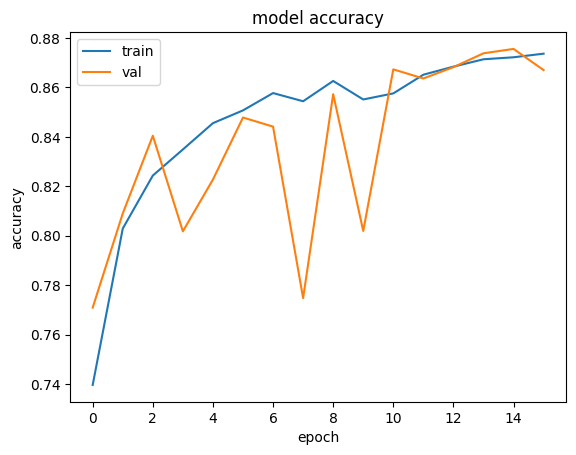

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

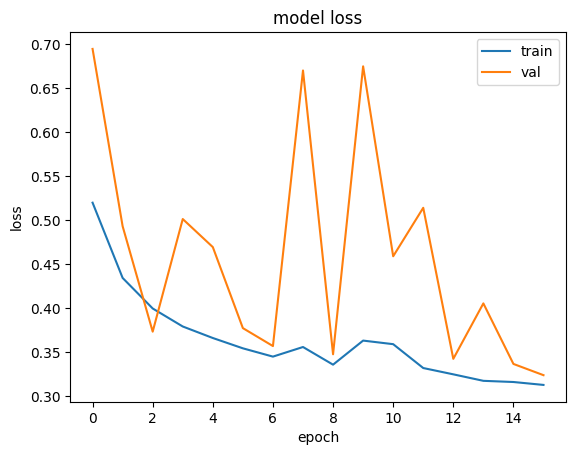

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()